In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
### test Random Forest for Doc2vec with 'under sample' approach

In [ ]:
from sklearn.utils import resample

In [ ]:
new_sample=pd.concat([X_train, y_train], axis=1)

In [ ]:
unwelcome = new_sample[new_sample.label=='unwelcome']
supportive = new_sample[new_sample.label=='supportive']

In [ ]:
supportive_downsampled = resample(supportive,
                                replace = False, # sample without replacement
                                n_samples = len(unwelcome), # match minority n
                                random_state = 27) # reproducible results

In [ ]:
down_sampled=pd.concat([supportive_downsampled,unwelcome])
down_sampled.label.value_counts()

supportive    3394
unwelcome     3394
Name: label, dtype: int64

In [ ]:
X_train_down=down_sampled.iloc[:,0:200]
y_train_down=down_sampled['label']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_down = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_down.fit(X_train_down, y_train_down)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

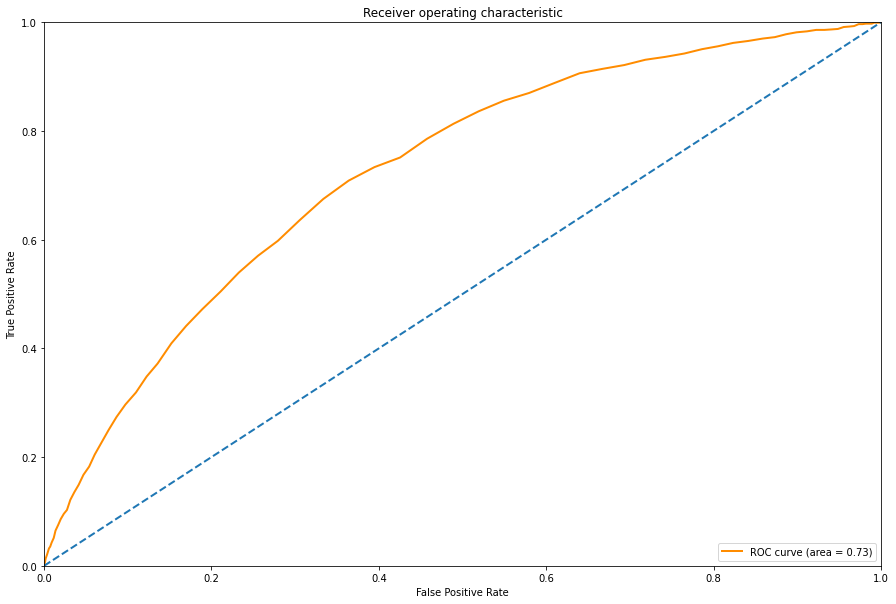

In [ ]:
y_pred_down = [x[1] for x in rf_down.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_down, pos_label = 'unwelcome')

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred_class_down=rf_down.predict(X_test)

In [ ]:
print("recall4:",metrics.recall_score(y_test, y_pred_class_down,pos_label='unwelcome'))
print("f1_score4:",metrics.f1_score(y_test, y_pred_class_down,pos_label='unwelcome'))
print('precision4:',metrics.precision_score(y_test, y_pred_class_down,pos_label='unwelcome'))

recall4: 0.6359610274579274
f1_score4: 0.11953716806792641
precision4: 0.06596839397280412


In [ ]:
### test logistic regression for Doc2vec with 'under sample' approach

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_down = LogisticRegression(solver='sag')
lr_down.fit(X_train_down, y_train_down)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

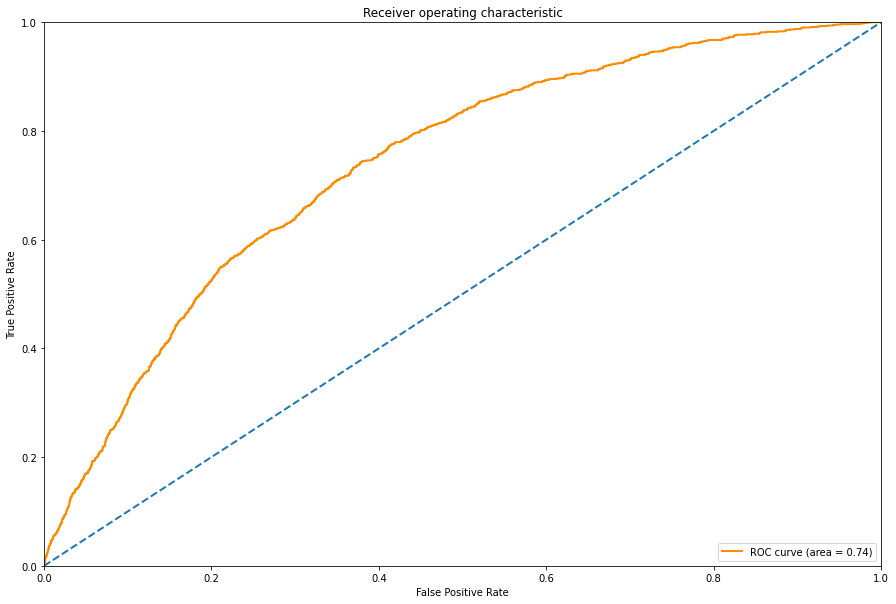

In [ ]:
y_pred_lr_down = [x[1] for x in lr_down.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr_down, pos_label = 'unwelcome')

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred_class_lr_down=lr_down.predict(X_test)

In [ ]:
print("recall6:",metrics.recall_score(y_test, y_pred_class_lr_down,pos_label='unwelcome'))
print("f1_score6:",metrics.f1_score(y_test, y_pred_class_lr_down,pos_label='unwelcome'))
print('precision6:',metrics.precision_score(y_test, y_pred_class_lr_down,pos_label='unwelcome'))

recall6: 0.6784765279007972
f1_score6: 0.12040238918579065
precision6: 0.0660629581716257


In [ ]:
#### test SVM for Doc2vec with 'under sample' approach

In [ ]:
from sklearn.svm import SVC # "Support Vector Classifier" 

In [ ]:
svc_down = SVC()
svc_down.probability=True
svc_down.fit(X_train_down,y_train_down)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

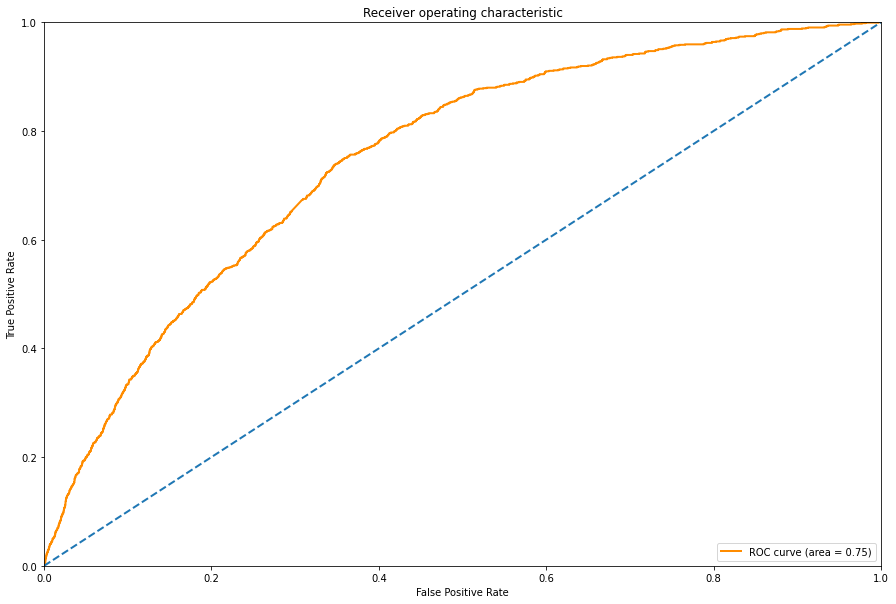

In [ ]:
y_pred_svc_down = [x[1] for x in svc_down.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc_down, pos_label = 'unwelcome')

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred_class_svc_down=svc_down.predict(X_test)

In [ ]:
print("recall7:",metrics.recall_score(y_test, y_pred_class_svc_down,pos_label='unwelcome'))
print("f1_score7:",metrics.f1_score(y_test, y_pred_class_svc_down,pos_label='unwelcome'))
print('precision7:',metrics.precision_score(y_test, y_pred_class_svc_down,pos_label='unwelcome'))

recall7: 0.6953055801594331
f1_score7: 0.12335009428032684
precision7: 0.06767824812483834


In [ ]:
### combine d2v and vader

In [ ]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X_d2v_vader,y,test_size=0.25,random_state=42)

In [ ]:
new_sample2=pd.concat([X_train2, y_train2], axis=1)

In [ ]:
unwelcome2 = new_sample2[new_sample2.label=='unwelcome']
supportive2 = new_sample2[new_sample2.label=='supportive']

In [ ]:
## down sample with SVC model

In [ ]:
supportive_downsampled2 = resample(supportive2,
                                replace = False, # sample without replacement
                                n_samples = len(unwelcome2), # match minority n
                                random_state = 27) # reproducible results

In [ ]:
down_sampled2=pd.concat([supportive_downsampled2,unwelcome2])
down_sampled2.label.value_counts()

supportive    3394
unwelcome     3394
Name: label, dtype: int64

In [ ]:
X_train_down2=down_sampled2.iloc[:,0:201]
y_train_down2=down_sampled2['label']

In [ ]:
svc_down2 = SVC()
svc_down2.probability=True
svc_down2.fit(X_train_down2,y_train_down2)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

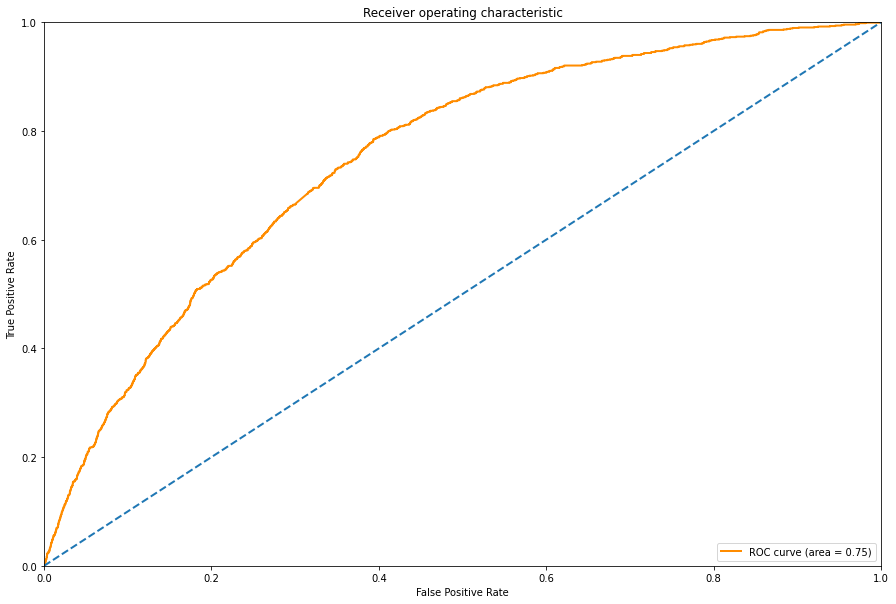

In [ ]:
y_pred_svc_down2 = [x[1] for x in svc_down2.predict_proba(X_test2)]
fpr, tpr, thresholds = roc_curve(y_test2, y_pred_svc_down2, pos_label = 'unwelcome')

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred_class_svc_down2=svc_down2.predict(X_test2)

In [ ]:
print("recall13:",metrics.recall_score(y_test2, y_pred_class_svc_down2,pos_label='unwelcome'))
print("f1_score13:",metrics.f1_score(y_test2, y_pred_class_svc_down2,pos_label='unwelcome'))
print('precision13:',metrics.precision_score(y_test2, y_pred_class_svc_down2,pos_label='unwelcome'))

recall13: 0.6997342781222321
f1_score13: 0.12250911064588664
precision13: 0.06713120326308633


In [ ]:
### combine d2v and liwc

In [ ]:
liwc=pd.read_csv('loseit_liwc.csv',index_col=0)

In [ ]:
X_d2v_liwc=pd.concat([X,liwc],axis=1)

In [ ]:
X_d2v_liwc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137627 entries, 0 to 137626
Columns: 264 entries, dm-0 to filler
dtypes: float64(264)
memory usage: 277.2 MB


In [ ]:
X_train3,X_test3,y_train3,y_test3=train_test_split(X_d2v_liwc,y,test_size=0.25,random_state=42)

In [ ]:
X_train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103220 entries, 124390 to 121958
Columns: 264 entries, dm-0 to filler
dtypes: float64(264)
memory usage: 208.7 MB


In [ ]:
new_sample3=pd.concat([X_train3, y_train3], axis=1)
unwelcome3 = new_sample3[new_sample3.label=='unwelcome']
supportive3 = new_sample3[new_sample3.label=='supportive']

In [ ]:
new_sample3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103220 entries, 124390 to 121958
Columns: 265 entries, dm-0 to label
dtypes: float64(264), object(1)
memory usage: 209.5+ MB


In [ ]:
supportive_downsampled3 = resample(supportive3,
                                replace = False, # sample without replacement
                                n_samples = len(unwelcome3), # match minority n
                                random_state = 27) # reproducible results

In [ ]:
down_sampled3=pd.concat([supportive_downsampled3,unwelcome3])
down_sampled3.label.value_counts()

supportive    3394
unwelcome     3394
Name: label, dtype: int64

In [ ]:
down_sampled3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6788 entries, 74849 to 769
Columns: 265 entries, dm-0 to label
dtypes: float64(264), object(1)
memory usage: 13.8+ MB


In [ ]:
X_train_down3=down_sampled3.iloc[:,0:264]
y_train_down3=down_sampled3['label']

In [ ]:
X_train_down3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6788 entries, 74849 to 769
Columns: 264 entries, dm-0 to filler
dtypes: float64(264)
memory usage: 13.7 MB


In [ ]:
svc_down3 = SVC()
svc_down3.probability=True
svc_down3.fit(X_train_down3,y_train_down3)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

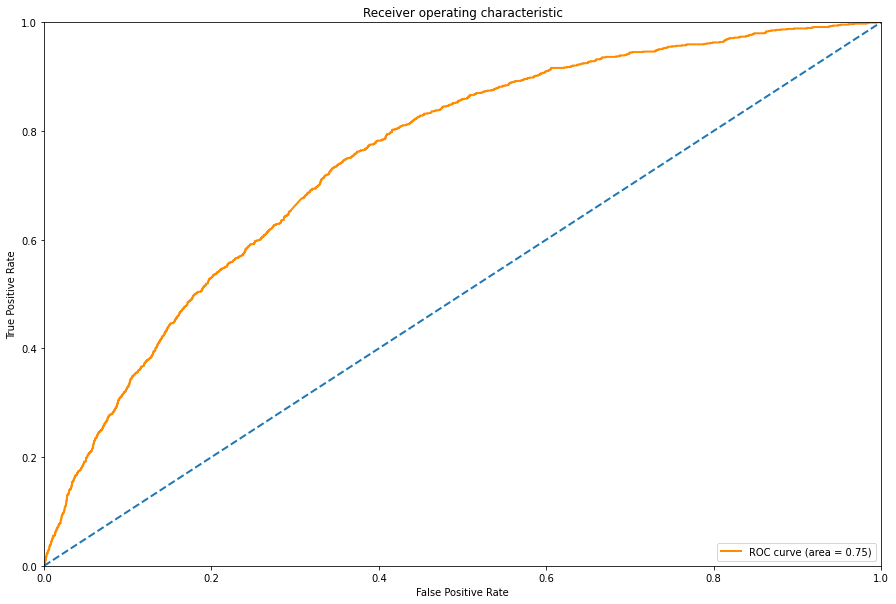

In [ ]:
y_pred_svc_down3 = [x[1] for x in svc_down3.predict_proba(X_test3)]
fpr, tpr, thresholds = roc_curve(y_test3, y_pred_svc_down3, pos_label = 'unwelcome')

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred_class_svc_down3=svc_down3.predict(X_test3)

In [ ]:
print("recall14:",metrics.recall_score(y_test3, y_pred_class_svc_down3,pos_label='unwelcome'))
print("f1_score14:",metrics.f1_score(y_test3, y_pred_class_svc_down3,pos_label='unwelcome'))
print('precision14:',metrics.precision_score(y_test3, y_pred_class_svc_down3,pos_label='unwelcome'))

recall14: 0.6935341009743136
f1_score14: 0.12344316569446633
precision14: 0.06775114649130397


In [ ]:
### combine d2v,vader,liwc

In [ ]:
X_all=pd.concat([X,liwc,vader],axis=1)

In [ ]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137627 entries, 0 to 137626
Columns: 265 entries, dm-0 to Vader_comp_score
dtypes: float64(265)
memory usage: 278.3 MB


In [ ]:
X_train4,X_test4,y_train4,y_test4=train_test_split(X_all,y,test_size=0.25,random_state=42)

In [ ]:
new_sample4=pd.concat([X_train4, y_train4], axis=1)
unwelcome4 = new_sample4[new_sample4.label=='unwelcome']
supportive4 = new_sample4[new_sample4.label=='supportive']

In [ ]:
supportive_downsampled4 = resample(supportive4,
                                replace = False, # sample without replacement
                                n_samples = len(unwelcome4), # match minority n
                                random_state = 27) # reproducible results

In [ ]:
down_sampled4=pd.concat([supportive_downsampled4,unwelcome4])
down_sampled4.label.value_counts()

supportive    3394
unwelcome     3394
Name: label, dtype: int64

In [ ]:
down_sampled4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6788 entries, 74849 to 769
Columns: 266 entries, dm-0 to label
dtypes: float64(265), object(1)
memory usage: 13.8+ MB


In [ ]:
X_train_down4=down_sampled4.iloc[:,0:265]
y_train_down4=down_sampled4['label']

In [ ]:
svc_down4 = SVC()
svc_down4.probability=True
svc_down4.fit(X_train_down4,y_train_down4)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

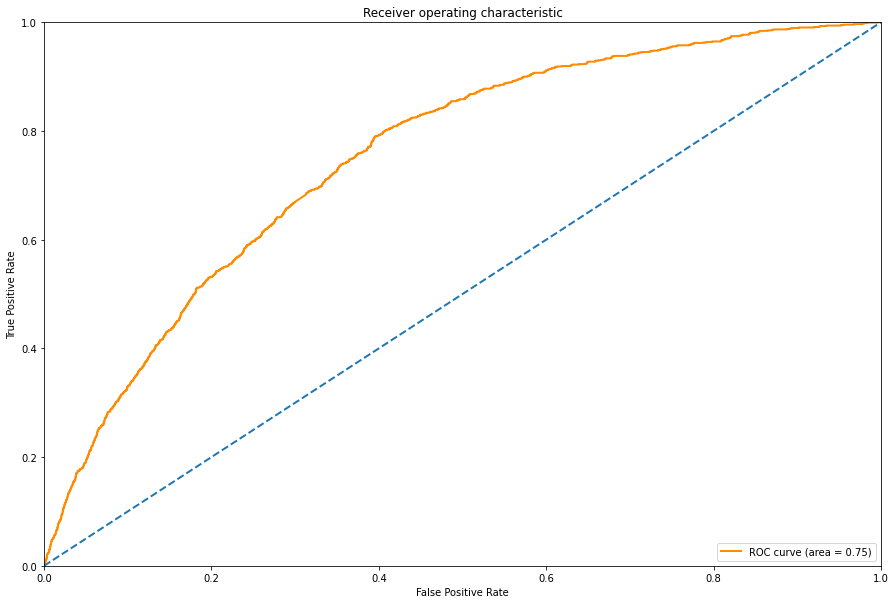

In [ ]:
y_pred_svc_down4 = [x[1] for x in svc_down4.predict_proba(X_test4)]
fpr, tpr, thresholds = roc_curve(y_test4, y_pred_svc_down4, pos_label = 'unwelcome')

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred_class_svc_down4=svc_down4.predict(X_test4)

In [ ]:
print("recall15:",metrics.recall_score(y_test4, y_pred_class_svc_down4,pos_label='unwelcome'))
print("f1_score15:",metrics.f1_score(y_test4, y_pred_class_svc_down4,pos_label='unwelcome'))
print('precision15:',metrics.precision_score(y_test4, y_pred_class_svc_down4,pos_label='unwelcome'))

recall15: 0.6979627989371124
f1_score15: 0.12191537092906321
precision15: 0.06679098152229192
